In [42]:
import plotly.graph_objs as go
import pandas as pd
import os 
import ipywidgets as widgets
import numpy as np
from IPython.display import display
from scipy import stats

In [43]:
# Getting the city`s name and folder`s name`
print("Input the city`s name : ")
# station na city
city = input()
print("Input the floder`s name : ")
folder = input()

# Check if the folder exists
if not os.path.exists(folder):
    print(f"Folder '{folder}' does not exist.")
else:
    # Check if the CSV file exists in the folder
    csv_file_path = os.path.join(folder, f"{city}.csv")
    if not os.path.isfile(csv_file_path):
        print(f"CSV file '{city}.csv' does not exist in the folder.")
    else:
        # Read the CSV file using Pandas
        df = pd.read_csv(csv_file_path)
        print("Data loaded successfully.")



Input the city`s name : 
Input the floder`s name : 
Data loaded successfully.


In [44]:
# All the cities in the folder
print(os.listdir(folder))

['.~lock.Bafq.csv#', 'Harat.csv', 'Bafq.csv', 'Meybod.csv', 'Abarkuh.csv', 'Aqda.csv', 'Yazd.csv', 'Gariz.csv', 'Robat-E-Poshtebadam.csv', 'Mehriz.csv', 'Marvast.csv', 'Bahabad.csv']


In [45]:
# Drop the columns which have NAN
# df.dropna(axis=1, inplace=True)
df

,data,station_id,station_name,region_id,region_name,lat,lon,station_elevation,ff_gust_max,dd_gust_max,...,tm_m,dd_dom,tsoilm_m,ff_dom,ff_dom_prc,umax_m,umin_m,evt_s,evt_min,evt_max
0,2000-01-01,40821,Yazd,OIYY,Yazd,31.9,54.28,1230.2,NaN,NaN,...,6.64516,270,-1.516130,1.96344,20,55.1613,21.70970,0.0,NaN,NaN
1,2000-02-01,40821,Yazd,OIYY,Yazd,31.9,54.28,1230.2,NaN,NaN,...,8.48276,270,-0.482759,2.72931,20,57.6897,17.93100,0.0,NaN,NaN
2,2000-03-01,40821,Yazd,OIYY,Yazd,31.9,54.28,1230.2,NaN,NaN,...,13.92260,270,4.290320,2.49462,16,37.0968,10.90320,193.7,2.2,12.0
3,2000-04-01,40821,Yazd,OIYY,Yazd,31.9,54.28,1230.2,NaN,NaN,...,23.28670,270,13.200000,2.56389,20,27.8333,9.46667,307.2,0.0,15.2
4,2000-05-01,40821,Yazd,OIYY,Yazd,31.9,54.28,1230.2,NaN,NaN,...,28.74520,270,18.548400,3.33441,24,20.6129,8.00000,443.6,10.1,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2022-11-01,40821,Yazd,OIYY,Yazd,31.9,54.28,1230.2,NaN,NaN,...,14.59330,135,7.300000,1.27500,20,58.7000,27.56670,119.0,1.4,6.8
275,2022-12-01,40821,Yazd,OIYY,Yazd,31.9,54.28,1230.2,NaN,NaN,...,7.98710,270,1.612900,1.84409,28,68.0000,38.38710,79.9,0.6,6.6
276,2023-01-01,40821,Yazd,OIYY,Yazd,31.9,54.28,1230.2,NaN,NaN,...,4.47097,315,-1.322580,1.42366,20,82.5484,43.09680,0.0,NaN,NaN
277,2023-02-01,40821,Yazd,OIYY,Yazd,31.9,54.28,1230.2,NaN,NaN,...,10.30360,270,4.035710,2.66369,25,67.2857,29.89290,24.3,3.2,6.5


In [46]:
# Reading help file for translation
df1 = pd.read_excel("Help.xlsx")

In [47]:
df1.fillna("NONE", inplace=True)

In [48]:
df1

,Unnamed: 0,سینوپتیک سه ساعته Hourly synoptic,سینوپتیک روزانه Daily Synoptic,سینوپتیک ماهانه Monthly Synoptic,متار
0,NONE,h - پایین ترین ابر قابل مشاهده,vvmin - حداقل دید افقی,ff_gust_max - بیشینه ماکزیمم سرعت باد گاستی,dd - جهت باد
1,NONE,vv - دید افقی,ff_max - ماکزیمم سرعت باد,dd_gust_max - جهت باد گاستی ماکزیمم,ff - سرعت باد
2,NONE,n - ابرناکی,dd_max - جهت باد ماکزیمم,ff_max_max - ماکزیمم سرعت باد,ff_gust - سرعت باد گاستی
3,NONE,dd - جهت باد,ffm - میانگین سرعت باد,dd_max_max - جهت ماکزیمم باد ماکزیمم,dd_gust - جهت باد گاستی
4,NONE,ff - سرعت باد,ff_gust_max - سرعت باد گاستی,ffm_m - میانگین سرعت باد,h - پایین ترین ابر قابل مشاهده
...,...,...,...,...,...
102,NONE,NONE,NONE,umax_m - میانگین مقدار حداکثر رطوبت نسبی,NONE
103,NONE,NONE,NONE,umin_m - میانگین مقدار حداقل رطوبت نسبی,NONE
104,NONE,NONE,NONE,evt_s - مجموع تبخیر,NONE
105,NONE,NONE,NONE,evt_min - حداقل تبخیر,NONE


In [49]:
# returns the Persian translation of the English word
def persian(target):
    for cols in df1.columns:
        for x in df1[cols]:
            if x.split(' - ')[0] == target:
                return (x.split('-')[1])

persian('evt_max')

' حداکثر رطوبت'

In [50]:
#Function that calculaes the moving_average
def moving_average(nums, window_size):
    moving_averages = []
    for i in range(len(nums) - window_size + 1):
        window = nums[i:i+window_size]
        average = sum(window) / window_size
        moving_averages.append(average)
    return moving_averages

In [51]:
"""Displaying plot class"""

class Plotter():

    def __init__(self, df):
        # Get the column titles starting from column till the end
        header_columns = df.columns[8:]

        # Convert the header_columns to a list of strings
        self.column_titles = [str(title).strip() for title in header_columns]

    # Combo selecting section for the parameter
    def on_select_parameter(self, change):
        self.selected_parameter = change['new']
        print("Selected Element:", self.selected_parameter)
        self.column_values = df[self.selected_parameter]
    
    def parameter_getter(self):
        return self.selected_parameter

    # Combo selecting section for the window-size
    def on_select_window_size(self, change):
        w_s = int(change['new'])
        print("Selected Element:", w_s)
        selected_size = moving_average(self.column_values, w_s)
        self.update_plot(self.selected_parameter, selected_size, w_s)

    # Showing the plot    
    def update_plot(self, Element1, ma_element, w_s):
        # Sccater the selected parameter
        data1 = go.Scatter(x=df['data'], y=df[Element1], mode='lines')
        # Scatter the moving average of selected parameter
        data2 = go.Scatter(x=df['data'][w_s//2 : -1*(w_s//2)], y=ma_element, mode='lines')
        # preparing the layout
        layout = go.Layout(xaxis_title='زمان', yaxis_title=persian(Element1), title='تغییرات روزانه ' + persian(Element1))
        # Showing the chart
        data = [data1, data2]
        fig = go.Figure(data=data, layout=layout)
        fig.show()

    # Defining the combo-box for parameter
    def show_the_parameter_box(self):
        # Create the combo box widget
        combo_var = widgets.Combobox(
            value="Select an element",
            placeholder="Select an element",
            options=self.column_titles,
            description='Select:',
            ensure_option=True
        )

        # Set the width of the combobox to make it larger
        combo_var.layout.width = '400px'  # Change the width to your desired size

        # Register the on_select function as the callback for the combo box
        combo_var.observe(self.on_select_parameter, names='value')

        # Display the combo box
        display(combo_var)

    # Defining the combo-box for window size
    def show_the_window_size(self):
        
        # Making the window size list
        window_size = np.arange(3, len(self.column_values), 2).astype(str)
        
        # Create the combo box moving average
        combo_var_window_select = widgets.Combobox(
            value="Select an element",
            placeholder="Select an element",
            options=tuple(window_size),
            description='Select:',
            ensure_option=True
        )

        # Set the width of the combobox to make it larger
        combo_var_window_select.layout.width = '400px'  # Change the width to your desired size

        # Register the on_select function as the callback for the combo box
        combo_var_window_select.observe(self.on_select_window_size, names='value')

        # Display the combo box
        display(combo_var_window_select)


In [52]:
# Making an object of Plotter
pl = Plotter(df)

# Get the parameter from the user
pl.show_the_parameter_box()


Combobox(value='Select an element', description='Select:', ensure_option=True, layout=Layout(width='400px'), o…

Selected Element: ff_gust_max


In [54]:
# Get the window size from the user
pl.show_the_window_size()

Combobox(value='Select an element', description='Select:', ensure_option=True, layout=Layout(width='400px'), o…

Selected Element: 7


In [55]:
# Get the parameter
parameter = pl.parameter_getter()
parameter

'ff_gust_max'

In [83]:
"""
This class is going to give us our data-set`s statical details
"""
class Statics():

        def __init__(self, df):
                
                # extracting months and years from the data-set
                df['data'] = pd.to_datetime(df['data'])
                months = pd.DataFrame(df.data.dt.month)
                years = pd.DataFrame(df.data.dt.year)
                days = pd.DataFrame(df.data.dt.day)
                df['Months'] = months
                df['Years'] = years
                df['Days'] = days
                self.mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

                # Making the data-set
                self.df_edited = pd.DataFrame(columns=['Year','Day']+self.mon)

                # Making a list of years
                self.years = []
                for i in df['data']:
                        if int(i.year) not in self.years:
                                self.years.append(int(i.year))

                # Making a list of days
                self.days = []
                for i in df['data']:
                        if int(i.day) not in self.days:
                                self.days.append(int(i.day))
                

        # Splits the data-set into separated months
        def splitter(self, parameter):
                df_edited = pd.DataFrame(columns=(['Year', 'Day']+self.mon))
                for year in self.years:
                        for day in self.days:
                                this = [year, day]
                                for month in range(1,13):                                        
                                        a = df[parameter].loc[(df['Months']==month) & (df['Years']==year) & (df['Days']==day)]
                                        if not a.empty:
                                                this.append(float(a))
                                        else:
                                                this.append(np.nan)
                                # Adding to df_editted
                                this = pd.DataFrame([this], columns=df_edited.columns)
                                df_edited = pd.concat([df_edited, this],ignore_index=True)
                return df_edited

In [84]:
st = Statics(df)
df_sp = st.splitter(parameter)

In [85]:
df_sp

,Year,Day,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
1,2001,1,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
3,2003,1,NaN,NaN,24.0,28.0,25.0,17.0,21.0,14.0,11.0,13.0,NaN,20.0
4,2004,1,15.0,22.0,21.0,24.0,23.0,17.0,21.0,NaN,NaN,13.0,35.0,12.0
5,2005,1,20.0,15.0,19.0,24.0,25.0,13.0,19.0,15.0,15.0,11.0,13.0,12.0
6,2006,1,17.0,20.0,21.0,19.0,19.0,16.0,16.0,18.0,13.0,11.0,15.0,13.0
7,2007,1,14.0,20.0,22.0,22.0,24.0,20.0,16.0,22.0,12.0,15.0,16.0,15.0
8,2008,1,19.0,20.0,20.0,18.0,30.0,14.0,19.0,13.0,19.0,15.0,13.0,12.0
9,2009,1,13.0,23.0,25.0,19.0,17.0,27.0,13.0,14.0,20.0,13.0,15.0,11.0


In [60]:
class MonthlyStatisticsCalculator():

    def __init__(self, df):
        self.df = df

    def calculate_monthly_statistics(self):
        statistics = []

        # Create a list to hold the statistics for each month
        month_stats = []

        # Iterate through each month's column in the DataFrame
        for month in self.df.columns[2:]:
            # Drop missing values for the current month
            month_data = self.df[month].dropna()

           
            # Calculate various statistics for the current month
            count = month_data.count()
            min_value = month_data.min()
            max_value = month_data.max()
            average = month_data.mean()
            median = month_data.median()
            mode = stats.mode(month_data)[0][0]
            variance = month_data.var()
            standard_deviation = np.sqrt(variance)
            standard_error = standard_deviation / np.sqrt(count)
            coefficient_of_variation = standard_deviation / average if average != 0 else np.nan
            
            # Append statistics to the month_stats list
            month_stat = {
                'Month': month,
                'Count': count,
                'Min': min_value,
                'Max': max_value,
                'Average': average,
                'Median': median,
                'Mode': mode,
                'Variance': variance,
                'Standard Deviation': standard_deviation,
                'Standard Error': standard_error,
                'Coefficient of Variation': coefficient_of_variation
            }
            month_stats.append(month_stat)

        # Create a DataFrame from the list of month_stats using a right part and left part
        right = pd.DataFrame(month_stats).transpose()
        right.columns = right.iloc[0]
        right.drop('Month', axis=0, inplace=True)
        
        left = pd.DataFrame()
        left['Year'] = np.array([' ']*10)
        left['Day'] = right.index.tolist() 
        right.reset_index(drop=True, inplace=True)

        statics_df = pd.concat([left, right], axis=1)

        return pd.concat([self.df, statics_df], axis=0)


In [61]:
# Create an instance of MonthlyStatisticsCalculator and calculate statistics
calculator = MonthlyStatisticsCalculator(df_sp)
monthly_statistics = calculator.calculate_monthly_statistics()

/tmp/ipykernel_10111/1811818816.py:24: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [62]:
# Display the DataFrame containing summarized statistics for each month
monthly_statistics

,Year,Day,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
1,2001,1,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
3,2003,1,NaN,NaN,24.0,28.0,25.0,17.0,21.0,14.0,11.0,13.0,NaN,20.0
4,2004,1,15.0,22.0,21.0,24.0,23.0,17.0,21.0,NaN,NaN,13.0,35.0,12.0
5,2005,1,20.0,15.0,19.0,24.0,25.0,13.0,19.0,15.0,15.0,11.0,13.0,12.0
6,2006,1,17.0,20.0,21.0,19.0,19.0,16.0,16.0,18.0,13.0,11.0,15.0,13.0
7,2007,1,14.0,20.0,22.0,22.0,24.0,20.0,16.0,22.0,12.0,15.0,16.0,15.0
8,2008,1,19.0,20.0,20.0,18.0,30.0,14.0,19.0,13.0,19.0,15.0,13.0,12.0
9,2009,1,13.0,23.0,25.0,19.0,17.0,27.0,13.0,14.0,20.0,13.0,15.0,11.0


In [63]:
class MonthlyStatisticsCalculatorSep():

    def __init__(self, df):
        self.df = df

    def calculate_monthly_statistics(self):
        statistics = []

        # Iterate through each month's column in the DataFrame
        for month in self.df.columns[2:]:
            # Drop missing values for the current month
            month_data = self.df[month].dropna()

            # Calculate various statistics for the current month
            count = month_data.count()
            min_value = month_data.min()
            max_value = month_data.max()
            average = month_data.mean()
            median = month_data.median()
            mode = stats.mode(month_data)[0][0]
            variance = month_data.var()
            standard_deviation = np.sqrt(variance)
            standard_error = standard_deviation / np.sqrt(count)
            coefficient_of_variation = standard_deviation / average if average != 0 else np.nan

            # Create a dictionary with the calculated statistics for the current month
            month_stats = {
                'Month': month,
                'Count': count,
                'Min': min_value,
                'Max': max_value,
                'Average': average,
                'Median': median,
                'Mode': mode,
                'Variance': variance,
                'Standard Deviation': standard_deviation,
                'Standard Error': standard_error,
                'Coefficient of Variation': coefficient_of_variation
            }

            # Append the statistics dictionary to the list
            statistics.append(month_stats)

        # Create a DataFrame from the list of statistics
        statistics_df = pd.DataFrame(statistics)
        return statistics_df

In [64]:
# Create an instance of MonthlyStatisticsCalculator and calculate statistics
calculator = MonthlyStatisticsCalculatorSep(df_sp)
monthly_statistics_sep = calculator.calculate_monthly_statistics()

/tmp/ipykernel_10111/37680787.py:20: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [65]:
monthly_statistics_sep

,Month,Count,Min,Max,Average,Median,Mode,Variance,Standard Deviation,Standard Error,Coefficient of Variation
0,Jan,15,12.0,20.0,16.266667,16.0,20.0,7.780952,2.789436,0.720229,0.171482
1,Feb,15,15.0,24.0,18.866667,18.0,17.0,6.838095,2.614975,0.675184,0.138603
2,Mar,17,13.0,25.0,19.411765,19.0,17.0,8.007353,2.829727,0.686310,0.145774
3,Apr,16,16.0,28.0,21.000000,19.5,19.0,10.800000,3.286335,0.821584,0.156492
4,May,16,14.0,30.0,22.625000,23.5,24.0,15.450000,3.930649,0.982662,0.173730
5,Jun,16,11.0,27.0,16.875000,16.5,13.0,20.516667,4.529533,1.132383,0.268417
6,Jul,16,12.0,21.0,15.687500,15.5,13.0,8.895833,2.982588,0.745647,0.190125
7,Aug,16,5.0,22.0,14.000000,14.0,14.0,12.133333,3.483293,0.870823,0.248807
8,Sep,12,11.0,20.0,14.333333,13.5,11.0,10.060606,3.171846,0.915633,0.221292
9,Oct,16,11.0,20.0,13.937500,13.5,13.0,6.062500,2.462214,0.615554,0.176661


In [66]:
class Statics_month():
    def __init__(self, df):
        self.df = df
        self.mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    def calculate_monthly_averages(self):
        avg_df = pd.DataFrame(columns=['Year'] + self.mon)

        years = self.df['Year'].unique()

        for year in years:
            year_data = [int(year)]
            for month in self.mon:
                avg = self.df.loc[self.df['Year'] == year, month].mean()
                year_data.append(float(avg))
            avg_df.loc[len(avg_df)] = year_data

        return avg_df

# Creating an instance of the Statics class and calculating monthly averages
st = Statics_month(df_sp)
monthly_avg_df = st.calculate_monthly_averages()

# Converting year column to int
monthly_avg_df['Year'] = monthly_avg_df['Year'].astype(int)

monthly_avg_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
1,2001,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
3,2003,NaN,NaN,24.0,28.0,25.0,17.0,21.0,14.0,11.0,13.0,NaN,20.0
4,2004,15.0,22.0,21.0,24.0,23.0,17.0,21.0,NaN,NaN,13.0,35.0,12.0
5,2005,20.0,15.0,19.0,24.0,25.0,13.0,19.0,15.0,15.0,11.0,13.0,12.0
6,2006,17.0,20.0,21.0,19.0,19.0,16.0,16.0,18.0,13.0,11.0,15.0,13.0
7,2007,14.0,20.0,22.0,22.0,24.0,20.0,16.0,22.0,12.0,15.0,16.0,15.0
8,2008,19.0,20.0,20.0,18.0,30.0,14.0,19.0,13.0,19.0,15.0,13.0,12.0
9,2009,13.0,23.0,25.0,19.0,17.0,27.0,13.0,14.0,20.0,13.0,15.0,11.0


In [69]:
class DataFrameSummaryGenerator:
    def __init__(self, df):
        self.df = df
    
    def generate_summary(self, parameter, row_value):
        summary_df = pd.DataFrame(columns=['Total Records:', '', 'Value'])
        first_day = self.df['data'][0]
        second_day = self.df['data'][1]
        last_day = self.df['data'][len(self.df['data'])-1]
        summary_df.loc[0] = ['parameter', '', parameter]  
        summary_df.loc[1] = ['Period of Time:', 'From:', first_day]
        summary_df.loc[2] = ['', 'To:', last_day]
        summary_df.loc[3] = ['Total NO. of Records:', '', (last_day - first_day).days]
        summary_df.loc[4] = ['NO. of Observations:', '', len(self.df[parameter])]
        summary_df.loc[5] = ['Interval between Data:', '', (str((second_day - first_day).days) + ' days')]
        summary_df.loc[6] = ['Missing Records:', '', ((last_day - first_day).days - len(self.df[parameter]))]
        summary_df.loc[7] = ['Incomplete Records:', '', self.df[parameter].isna().sum()]

        return summary_df

# Create an instance of the DataFrameSummaryGenerator class
summary_generator = DataFrameSummaryGenerator(df)

# Define your row value
row_value = 'RowValue' 

# Generate the summary using the existing parameter value and row value
summary = summary_generator.generate_summary(parameter, row_value)

# Display the generated summary DataFrame
summary


,Total Records:,,Value
0,parameter,,ff_gust_max
1,Period of Time:,From:,2000-01-01 00:00:00
2,,To:,2023-03-01 00:00:00
3,Total NO. of Records:,,8460
4,NO. of Observations:,,279
5,Interval between Data:,,31 days
6,Missing Records:,,8181
7,Incomplete Records:,,93


In [86]:
for x in df['evt_max']:
    print(x)

nan
nan
12.0
15.2
17.3
20.7
23.2
19.5
19.8
14.0
7.2
6.0
nan
nan
9.6
16.7
18.2
19.9
23.4
21.2
41.5
12.2
13.8
3.2
5.4
nan
15.0
15.5
20.3
22.5
22.2
21.7
17.3
13.0
6.8
5.2
nan
nan
15.4
13.7
17.8
21.4
23.8
18.6
16.0
14.5
8.2
0.0
nan
nan
10.2
15.4
20.0
17.7
20.0
20.1
15.7
12.3
9.0
nan
nan
nan
12.0
18.0
19.3
20.7
21.2
20.4
18.3
12.4
8.5
5.5
nan
nan
12.5
16.1
18.8
18.1
22.0
22.0
16.4
10.3
9.0
6.0
nan
30.1
12.5
16.0
18.1
20.4
19.4
17.8
30.1
9.9
9.1
20.1
nan
nan
13.0
13.3
18.5
20.0
20.5
19.3
17.2
11.6
5.5
4.8
nan
nan
17.5
15.0
20.3
18.0
22.0
18.6
16.0
11.0
8.5
4.4
10.0
7.4
13.0
15.5
21.5
19.8
21.2
19.0
20.0
13.0
7.0
8.0
nan
nan
11.8
30.0
17.0
20.1
22.1
20.7
16.7
13.5
5.2
5.0
0.0
0.0
14.8
13.4
18.9
19.3
21.5
19.7
13.8
11.0
10.6
4.5
0.0
7.5
10.7
14.5
19.8
19.8
20.7
20.7
14.8
10.0
6.8
6.2
nan
nan
11.2
12.5
17.0
20.5
21.4
23.7
15.5
12.4
5.9
6.4
6.8
9.9
12.8
19.4
17.3
20.3
18.3
17.0
13.4
9.5
9.6
7.4
nan
nan
11.8
13.7
17.5
16.3
19.4
16.0
13.0
10.5
7.1
9.8
4.0
nan
9.3
15.2
20.0
19.6
20.0
17.0
14.2
12.4

In [87]:
"""
Imputing datas in param1 using param2 in different ways
"""
# Linear Imputation
def LinearImputation(param1, param2):
    from sklearn.linear_model import LinearRegression

    # Split data into train and test sets
    train_data = df.dropna()
    test_data = df[df[param1].isnull()]

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(train_data[[param2]], train_data[param1])

    # Predict missing values using test data's features
    predicted_values = model.predict(test_data[[param2]])

    # Assign predicted values to the missing entries
    test_data[param1] = predicted_values

    # Replace the values in the original DataFrame
    df.loc[test_data.index, param1] = predicted_values


# Simple Imputation
def SimpleImputation(param1):
    # Loop through the entire length of the DataFrame column
    for i in range(len(df[param1])):
        # Check if the current value is NaN (missing)
        if np.isnan(df[param1][0]):
            # Find the first non-NaN value
            j = 0
            while np.isnan(df[param1][j]):
                j += 1
            # Replace the missing value with the first non-NaN value
            df[param1][i] = df[param1][j]
        
        # Check if the current value is NaN (missing)
        if np.isnan(df[param1][i]):
            # Impute using nearby values
            before = df[param1][i - 1]
            j = i
            while np.isnan(df[param1][j]):
                j += 1
            after = df[param1][j]
            # Replace the missing value with the average of nearby values
            df[param1][i] = (before + after) / 2

In [92]:
# Asking for the parameter we want to impute

print("Which parameter you want to impute : ")
param1 = input()
print("Which parameter you want to use to impute : ")
param2 = input()
print("Which type you want to use to impute : [Simple, Linear]")
way = input()

ok = True

if df[param1].isna==0:
    print("I can`t see loss of datas.")
    ok = False

if df[param2].isna().sum()!=0:
    print("Second parameter shouldn`t be incompletd.")
    ok = False

if ok:
    if way=='Simple':
        SimpleImputation(param1)
    elif way=='Linear': 
        LinearImputation(param1, param2)
    else:
        print('Way not found.')
    print("Done.")

Which parameter you want to impute : 
Which parameter you want to use to impute : 
Which type you want to use to impute : [Simple, Linear]
Done.


16.252402962018486
15.823872692053058
17.537993771914767
15.395342422087632
15.395342422087632
17.537993771914767
14.966812152122206
14.966812152122206
15.395342422087632
17.537993771914767
14.109751612191351
12.0
15.395342422087632
16.680933231983914
13.0
15.823872692053058
17.537993771914767
15.395342422087632
15.395342422087632
14.538281882156777
15.395342422087632
15.823872692053058
17.96652404188019
15.395342422087632
16.252402962018486
17.10946350194934
19.6806451217419
17.537993771914767
17.537993771914767
15.823872692053058
15.823872692053058
5.0
13.681221342225925
14.109751612191351
15.395342422087632
15.395342422087632
15.395342422087632
20.96623593163818
24.0
28.0
25.0
17.0
21.0
14.0
11.0
13.0
14.538281882156777
20.0
15.0
22.0
21.0
24.0
23.0
17.0
21.0
14.538281882156777
14.538281882156777
13.0
35.0
12.0
20.0
15.0
19.0
24.0
25.0
13.0
19.0
15.0
15.0
11.0
13.0
12.0
17.0
20.0
21.0
19.0
19.0
16.0
16.0
18.0
13.0
11.0
15.0
13.0
14.0
20.0
22.0
22.0
24.0
20.0
16.0
22.0
12.0
15.0
16.0

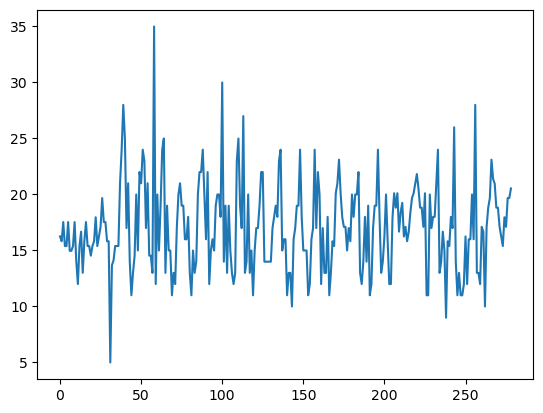

In [94]:
import matplotlib.pyplot as plt

for x in df[parameter]:
    print(x)


plt.plot(np.arange(len(df[parameter])), df[parameter])